In [28]:
from nilearn.datasets import MNI152_FILE_PATH
from nilearn import datasets
from nilearn import plotting
from nilearn import image
import matplotlib.pyplot as plt

# 2. load and save

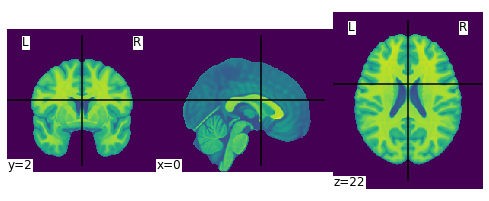

In [26]:
## looking at our data
plotting.plot_img(MNI152_FILE_PATH)
plotting.show()

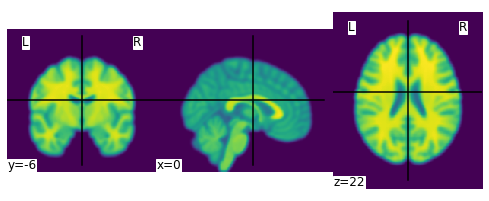

In [25]:
## smoothing
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)
more_smooth_anat_img = image.smooth_img(smooth_anat_img, fwhm=3)
plotting.plot_img(more_smooth_anat_img)
plotting.show()

In [27]:
## save file
more_smooth_anat_img.to_filename('more_smooth_anat_img.nii.gz')

# 3. handling and visualizing

In [34]:
## download tutorial datasets
print("Datasets are stored in: %s"%(datasets.get_data_dirs()))
motor_images = datasets.fetch_neurovault_motor_task()
tmap_filename = motor_images.images[0]
rsn = datasets.fetch_atlas_smith_2009()


Datasets are stored in: ['/home/duzc/nilearn_data']


In [44]:
## download resting-state networks
datasets.fetch_atlas_smith_2009()


Dataset created in /home/duzc/nilearn_data/smith_2009



Downloaded 15114240 of 15129514 bytes (99.9%,    0.6s remaining) ...done. (564 seconds, 9 min)


Downloaded 7544832 of 7565016 bytes (99.7%,    0.7s remaining) ...done. (282 seconds, 4 min)


Downloaded 53026816 of 53028809 bytes (100.0%,    0.1s remaining) ...done. (1866 seconds, 31 min)


Downloaded 19111936 of 19114114 bytes (100.0%,    0.1s remaining) ...done. (671 seconds, 11 min)


Downloaded 9560064 of 9566632 bytes (99.9%,    0.2s remaining) ...done. (351 seconds, 5 min)


Downloaded 66969600 of 67017538 bytes (99.9%,    1.9s remaining) ...done. (2598 seconds, 43 min)


{'rsn20': '/home/duzc/nilearn_data/smith_2009/rsn20.nii.gz',
 'rsn10': '/home/duzc/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz',
 'rsn70': '/home/duzc/nilearn_data/smith_2009/rsn70.nii.gz',
 'bm20': '/home/duzc/nilearn_data/smith_2009/bm20.nii.gz',
 'bm10': '/home/duzc/nilearn_data/smith_2009/PNAS_Smith09_bm10.nii.gz',
 'bm70': '/home/duzc/nilearn_data/smith_2009/bm70.nii.gz',
 'description': b"Smith 2009 Atlas\n\n\nNotes\n-----\nThis atlas provides spatial maps of the major brain networks during task-constrained brain activity and task-unconstrained (resting) brain activity.\n\nThose were derived from 6 minutes of resting-state time series from 36 subjects as well as from the from the smoothed task activity coordinates of healthy subjects stored in the BrainMap database.\n\nContent\n-------\n    :'rsn20': 20 ICA maps derived from resting-state decomposition\n    :'rsn10': 10 ICA maps from the above that matched across task and rest\n    :'rsn70': 70 ICA maps derived from resting

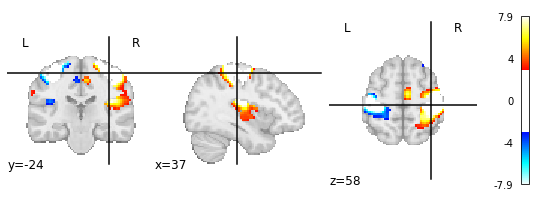

In [43]:
## visualizing a 3D file
plotting.plot_stat_map(tmap_filename, threshold=3)
plotting.show()

In [46]:
## visualizing a 4D file
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
image.load_img(rsn).shape

(91, 109, 91, 10)

(91, 109, 91)


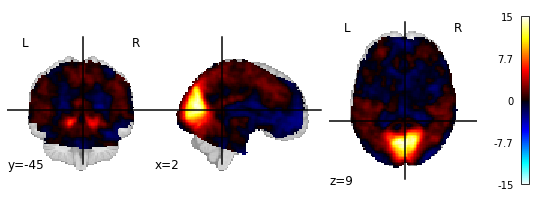

In [49]:
## first volumn
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn)
plotting.show()

In [ ]:
## all volumn
for img in image.iter_img(rsn):
    plotting.plot_stat_map(img, threshold=3, display_mode='z', 
                           cut_coords=1, colorbar=False)

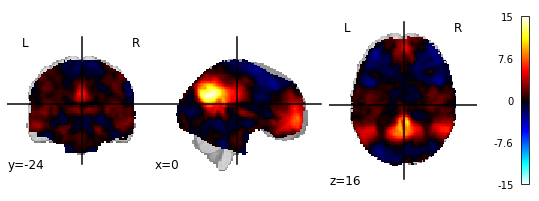

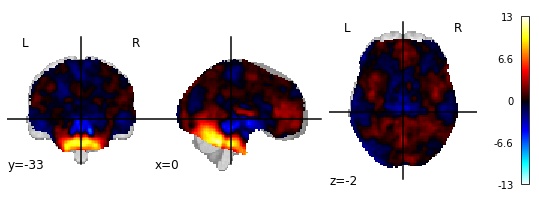

In [52]:
## selected volumn
selected_volumn = image.index_img(rsn, slice(3, 5))
for img in image.iter_img(selected_volumn):
    plotting.plot_stat_map(img)